Import Libraries and dataset file

In [113]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Step 2: Load and explore the dataset
data = pd.read_csv('csv_result-chronic_kidney_disease.csv')
data.columns = data.columns.str.strip()  # Remove any leading/trailing whitespace in column names
# Confirm column names
print("Columns in dataset:", data.columns)

print("Data Shape:", data.shape)
print(data.head())
print(data.info())  # See data types and missing values


Columns in dataset: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')
Data Shape: (400, 26)
   id age  bp     sg al su     rbc        pc         pcc          ba  ... pcv  \
0   1  48  80  1.020  1  0       ?    normal  notpresent  notpresent  ...  44   
1   2   7  50  1.020  4  0       ?    normal  notpresent  notpresent  ...  38   
2   3  62  80  1.010  2  3  normal    normal  notpresent  notpresent  ...  31   
3   4  48  70  1.005  4  0  normal  abnormal     present  notpresent  ...  32   
4   5  51  80  1.010  2  0  normal    normal  notpresent  notpresent  ...  35   

   wbcc rbcc  htn   dm cad appet   pe  ane class  
0  7800  5.2  yes  yes  no  good   no   no   ckd  
1  6000    ?   no   no  no  good   no   no   ckd  
2  7500    ?   no  yes  no  poor   no  yes   ckd  
3  6700  3.9  yes   no  no  poor  yes  yes   

Pre-process Data

In [114]:
# Step 3: Preprocess data
# Define columns based on their types from the description
integer_cols = ['age', 'bp', 'bgr', 'bu', 'sod', 'pcv', 'wbcc']
continuous_cols = ['sc', 'pot', 'hemo', 'rbcc']
categorical_cols = ['sg', 'al', 'su']
binary_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
target_col = 'class'

# Continue with processing
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN for processing

# Convert integer and continuous columns to numeric types
for col in integer_cols + continuous_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Impute missing values for numerical columns (median)
num_imputer = SimpleImputer(strategy='median')
data[integer_cols + continuous_cols] = num_imputer.fit_transform(data[integer_cols + continuous_cols])

# Impute missing values for categorical columns (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols + binary_cols + [target_col]] = cat_imputer.fit_transform(data[categorical_cols + binary_cols + [target_col]])

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols + binary_cols + [target_col]:
    data[col] = label_encoder.fit_transform(data[col])




Split the data into Training and Testing Set

In [115]:
# Step 4: Split the data into training and testing sets
X = data.drop(columns=[target_col])
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Apply k-NN Algorithm and Evaluate Model

n =  10
Accuracy: 0.9875
F1 Score: 0.9875489695111564


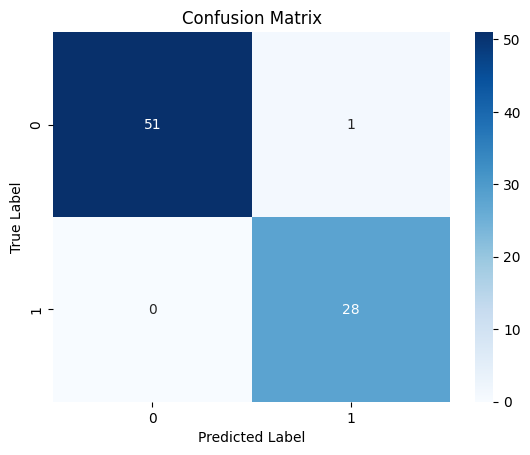

n =  40
Accuracy: 0.975
F1 Score: 0.9751859364435429


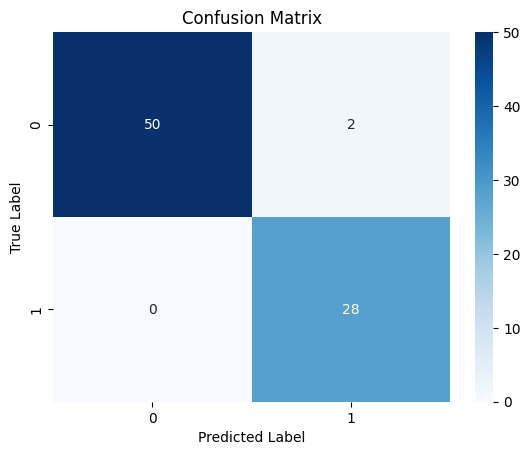

n =  70
Accuracy: 0.9625
F1 Score: 0.9628964591374392


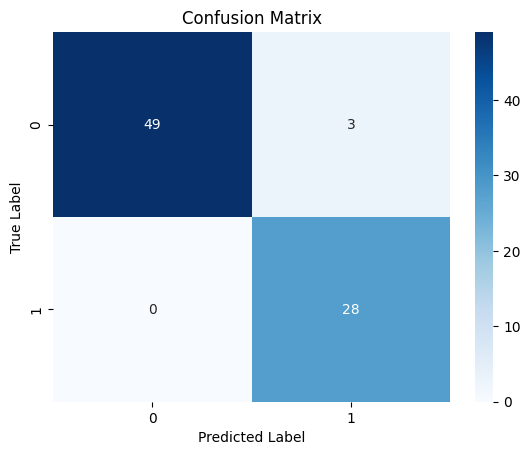

n =  100
Accuracy: 0.9125
F1 Score: 0.9142038946162657


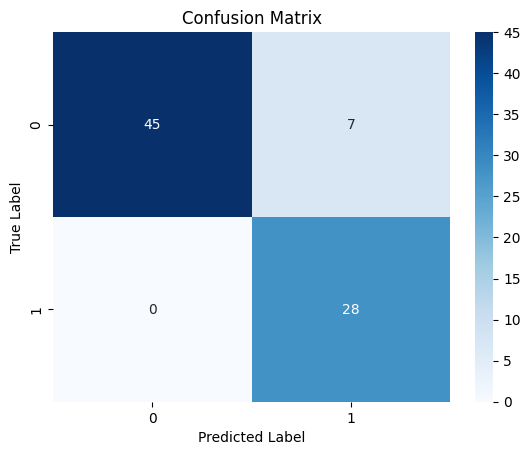

Best n_neighbors: 10
Accuracy: 0.99
F1 Score: 0.99
Time Taken: 0.0134 seconds


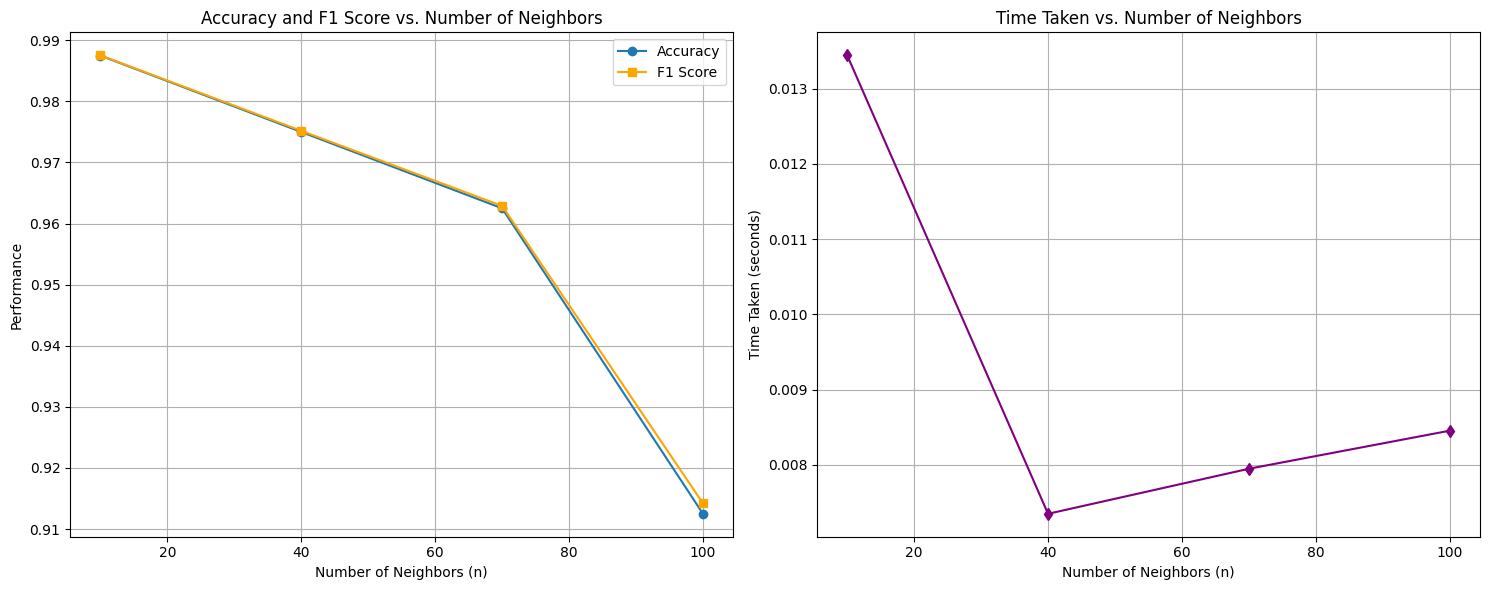

In [116]:
import time
import matplotlib.pyplot as plt

# Define a range for n_neighbors
n_values = range(10, 101, 30) 
accuracies = []
f1_scores = []
times = []

# Iterate over different values of n_neighbors
for n in n_values:
    start_time = time.time()  # Start timer
    
    # Create and train the K-NN model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Predict and evaluate performance
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Stop timer
    end_time = time.time()
    elapsed_time = end_time - start_time  # Time taken for this model

    # Store results
    accuracies.append(accuracy)
    f1_scores.append(f1)
    times.append(elapsed_time)

    # Step 7: Evaluate the model
    print("n = ",n)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Find the best n based on performance and time
best_n_idx = np.argmax(accuracies)  # Index of best accuracy
best_n = n_values[best_n_idx]
best_accuracy = accuracies[best_n_idx]
best_f1 = f1_scores[best_n_idx]
best_time = times[best_n_idx]

print(f"Best n_neighbors: {best_n}")
print(f"Accuracy: {best_accuracy:.2f}")
print(f"F1 Score: {best_f1:.2f}")
print(f"Time Taken: {best_time:.4f} seconds")

# Plotting accuracy, F1 score, and time taken for different values of n_neighbors
plt.figure(figsize=(15, 6))

# Accuracy and F1 Score Plot
plt.subplot(1, 2, 1)
plt.plot(n_values, accuracies, marker='o', label="Accuracy")
plt.plot(n_values, f1_scores, marker='s', label="F1 Score", color='orange')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Performance')
plt.title('Accuracy and F1 Score vs. Number of Neighbors')
plt.legend()
plt.grid(True)

# Time Plot
plt.subplot(1, 2, 2)
plt.plot(n_values, times, marker='d', color='purple')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken vs. Number of Neighbors')
plt.grid(True)

plt.tight_layout()
plt.show()
